
# Teleportación Cuántica

### Juan Diego Mejía



Link a implementación IBM [Link a circuito](https://quantum-computing.ibm.com/composer/files/new?initial=N4IgdghgtgpiBcIAqMA2MAOB7ATgFwjwEsswQAaEARwgGcoEQB5ABQFEA5ARQEEBlALIACAEwA6AAwBuADpgiYAMaoArgBMYQmdTREARgEYxCxdtlg5VHDADmQqgG0AzAF1zi63cXO3cuQAt7BwNfJQAPIJDyRxFQvQgcHCIYHEiXaIdYjIlQxQjHHIyQ80CCuISklKCssqLQ2DoVayCcoQBaAD4hbxzzBtomzUcQ9q7vYrl4xOTUmPTa4dD8zNCAL2q3ChANWg8iDGJSRhAAXyA)

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector


Primero creamos los qbits y los c register para tener control de lo que está sucediendo en la ejecución

#### $\psi_0$

<img src="./psi0.jpeg">




In [2]:
q = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
c0 = ClassicalRegister(1, name="c0") # and 2 classical bits
c1 = ClassicalRegister(1, name="c1") # in 2 different registers
circuit = QuantumCircuit(q, c0, c1)
circuit.x(q[0])
circuit.barrier(q[0],q[1],q[2])

circuit.draw()

┌───┐ ░ 
 q_0: ┤ X ├─░─
      └───┘ ░ 
 q_1: ──────░─
            ░ 
 q_2: ──────░─
            ░ 
c0: 1/════════
              
c1: 1/════════

Vamos a teleportar el estado de q_0 que en este caso será $\psi$ a q_2

Para Esto, tenemos que superponer los estados, creando un estado de Bell, para esto tenemos que aplicar las Compuerta Hadamar $\frac{1}{\sqrt{2}}\begin{equation}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
\end{equation} $ y  Cx (negación controlada) 


#### $\psi_1$
<img src="./psi1.jpeg">


#### $\psi_2$
<img src="./psi2.jpeg">


In [3]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw()

┌───┐ ░           
 q_0: ┤ X ├─░───────────
      └───┘ ░ ┌───┐     
 q_1: ──────░─┤ H ├──■──
            ░ └───┘┌─┴─┐
 q_2: ──────░──────┤ X ├
            ░      └───┘
c0: 1/══════════════════
                        
c1: 1/══════════════════

Ahora para evitar que se realicen operaciones a los qbits en ordenes indeceados, vemos a añadir una barrera para controlar el flujo de tiempo

In [4]:
circuit.barrier(q[0],q[1],q[2])
circuit.draw()

┌───┐ ░            ░ 
 q_0: ┤ X ├─░────────────░─
      └───┘ ░ ┌───┐      ░ 
 q_1: ──────░─┤ H ├──■───░─
            ░ └───┘┌─┴─┐ ░ 
 q_2: ──────░──────┤ X ├─░─
            ░      └───┘ ░ 
c0: 1/═════════════════════
                           
c1: 1/═════════════════════

Ahora aplicamos una vez más la compuerta Cx y posteriormente aplicamos Hadamar otra vez

#### $\psi_3$
<img src="./psi3.jpeg">

#### $\psi_4$
<img src="./psi4.jpeg">


In [5]:
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ 
 q_0: ┤ X ├─░────────────░───■──┤ H ├─░─
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ 
 q_1: ──────░─┤ H ├──■───░─┤ X ├──────░─
            ░ └───┘┌─┴─┐ ░ └───┘      ░ 
 q_2: ──────░──────┤ X ├─░────────────░─
            ░      └───┘ ░            ░ 
c0: 1/══════════════════════════════════
                                        
c1: 1/══════════════════════════════════

Ahora realizamos una medición a los valores en q_0 y en q_1 para terminar de mandar el estado de q_0 a q_2 (debido al teorema de la no clonación)


#### $\psi_5$
<img src="./psi5.jpeg">


#### $\psi_6$
<img src="./psi6.jpeg">


In [6]:
circuit.measure(0,0)
circuit.measure(1,1)
circuit.barrier()
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░ 
 q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░─
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░ 
 q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░─
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ 
 q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─
            ░      └───┘ ░            ░  ║  ║  ░ 
c0: 1/═══════════════════════════════════╩══╬════
                                         0  ║    
                                            ║    
c1: 1/══════════════════════════════════════╩════
                                            0

Ahora aplicamos x y z y las mandamos a la salida c0 y c1 respectivamente en caso de que la medición que realicen de q_2 sea 1

#### $\psi_7$
<img src="./psi7.jpeg">

#### $\psi_8$
<img src="./psi8.jpeg">

In [7]:
circuit.x(2).c_if(c0,1)
circuit.z(2).c_if(c1,1)
circuit.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░               
 q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────────────
      └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
 q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
 q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            ░      └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                         ║  ║    ┌──╨──┐   ║   
c0: 1/═══════════════════════════════════╩══╬════╡ = 1 ╞═══╬═══
                                         0  ║    └─────┘┌──╨──┐
c1: 1/══════════════════════════════════════╩═══════════╡ = 1 ╞
                                            0           └─────┘

Ejecución en IBM composer utilizando la máquina BELEM y 2048 shots para la muestra, arrojó los siguientes resultados
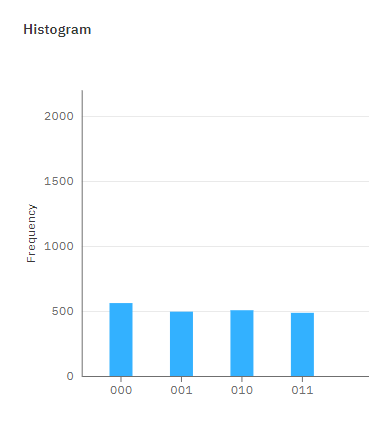
Lo cuál es comporte, ya que se evidencia entrelazamiento entre los qubits, ya que al conocer el estado de los dos primeros, se sabe el valor del último qubit